<a href="https://colab.research.google.com/github/LolaSM/neck-pain/blob/main/speed_acceleration/neural_networks_neck_pain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf

In [ ]:
url ='https://github.com/LolaSM/neck-pain/blob/main/speed_acceleration/tablaVectores_AB_speed_acceleration.csv'
patients_vector = pd.read_csv(url)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
patients_vector['group'] = le.fit_transform(patients_vector['group'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop identifier
df = patients_vector.drop(columns=["patient"])
X = df.drop("group", axis=1)
y = df["group"]

# Split: 80% Train, 10% Validation, 10% Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

print(f"Size of training set: {X_train.shape[0]} ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Size of validation set: {X_val.shape[0]} ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"Size of test set: {X_test.shape[0]} ({X_test.shape[0]/len(df)*100:.1f}%)")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Combine train and val for training the final model
X_train_full = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)
print(f"Size of final training set: {X_train_full.shape[0]} ({X_train.shape[0]/len(df)*100:.1f}%)")

Size of training set: 69 (79.3%)
Size of validation set: 9 (10.3%)
Size of test set: 9 (10.3%)
Size of final training set: 78 (79.3%)


In [ ]:
# Seed for reproducibility
tf.keras.utils.set_random_seed(42)

# Define model
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Fit model
history = model.fit(
    X_train_full, y_train_full,
    epochs=100,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5266 - loss: 0.6987 - val_accuracy: 0.6250 - val_loss: 0.6685
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7276 - loss: 0.6298 - val_accuracy: 0.6250 - val_loss: 0.6576
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7696 - loss: 0.5918 - val_accuracy: 0.6875 - val_loss: 0.6533
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7636 - loss: 0.5614 - val_accuracy: 0.7500 - val_loss: 0.6536
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7912 - loss: 0.5349 - val_accuracy: 0.7500 - val_loss: 0.6559
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7881 - loss: 0.5102 - val_accuracy: 0.7500 - val_loss: 0.6615
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8407 - loss: 0.4872 - val_accuracy: 0.7500 - val_loss: 0.6695
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8664 - loss: 0.4654 - val_accuracy: 0.7500 - val_loss:

In [ ]:
# Evaluate on test
loss, accuracy = model.evaluate(X_test_scaled, y_test.to_numpy())
print(f"\nNeural Network - Test Accuracy: {accuracy:.3f}")

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion matrix & classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6667 - loss: 0.6514



Neural Network - Test Accuracy: 0.667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Confusion Matrix:
 [[2 2]
 [1 4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.67      0.80      0.73         5

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9



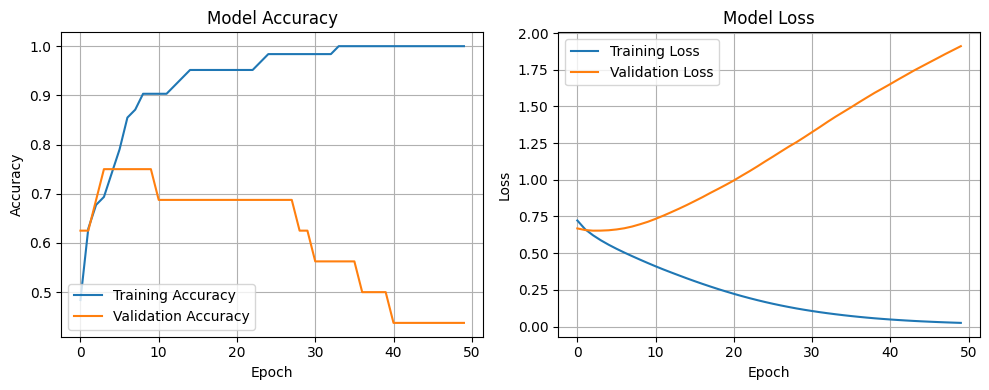

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convierte el historial a DataFrame
history_df = pd.DataFrame(history.history)

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_df["accuracy"], label="Training Accuracy")
plt.plot(history_df["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_df["loss"], label="Training Loss")
plt.plot(history_df["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Neural Network 2

Using cross-validation

In [ ]:
tf.keras.utils.set_random_seed(42)

# Cross-validation (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results
accuracies = []
histories = []

In [ ]:
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n=== Fold {fold} ===")

    # Divide data of actual fold
    X_train_fold, X_val_fold = X.iloc[train_idx].values, X.iloc[val_idx].values
    y_train_fold, y_val_fold = y.iloc[train_idx].values, y.iloc[val_idx].values

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)

    model = Sequential([
        Input(shape=(X.shape[1],)),
        Dense(50, activation='relu', kernel_regularizer=l2(0.004)),
        Dense(50, activation='relu', kernel_regularizer=l2(0.004)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    history = model.fit(
        X_train_scaled, y_train_fold,
        epochs=100,
        batch_size=8,
        validation_data=(X_val_scaled, y_val_fold),
        callbacks=[early_stop],
        verbose=0
    )

    # Evaluation on fold
    loss, acc = model.evaluate(X_val_scaled, y_val_fold, verbose=0)
    print(f"Validation accuracy: {acc:.3f}")
    accuracies.append(acc)
    histories.append(history.history)



=== Fold 1 ===
Validation accuracy: 0.833

=== Fold 2 ===
Validation accuracy: 0.611

=== Fold 3 ===
Validation accuracy: 0.588

=== Fold 4 ===
Validation accuracy: 0.706

=== Fold 5 ===
Validation accuracy: 0.765


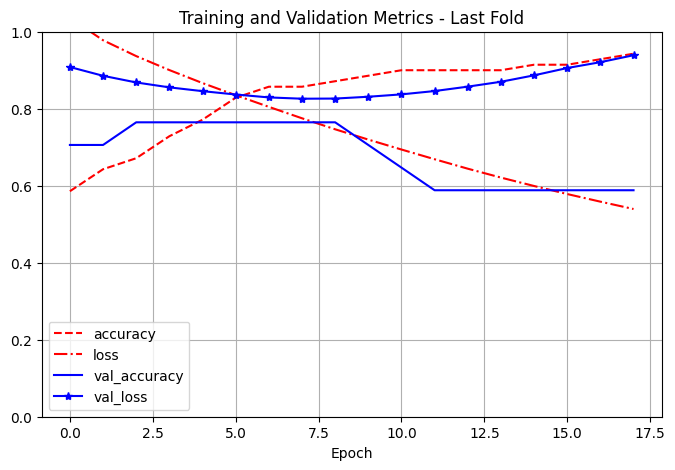


=== Cross-validation results ===
Mean validation accuracy: 0.701
Standard deviation: 0.092


In [ ]:
# Visualizar el historial del último fold
if histories:
    pd.DataFrame(histories[-1]).plot(
        figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch",
        style=["r--", "r-.", "b-", "b-*"]
    )
    plt.title("Training and Validation Metrics - Last Fold")
    plt.legend(loc="lower left")
    plt.show()

# Mostrar resultados globales
print("\n=== Cross-validation results ===")
print(f"Mean validation accuracy: {np.mean(accuracies):.3f}")
print(f"Standard deviation: {np.std(accuracies):.3f}")